In [142]:
import numpy as np
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt
import sys

# Problem 1

In [143]:
def cond(A):
    S=la.svd(A)[1]
    sigma_max=S.max()
    sigma_min=S.min()
    if sigma_min<1e-16:
        return np.inf
    else:
        return sigma_max/sigma_min

In [144]:
A=np.random.randn(5,5)
Q,R=la.qr(A)
cond(Q), cond(np.ones((2,2)))

(1.0000000000000007, inf)

# Problem 2

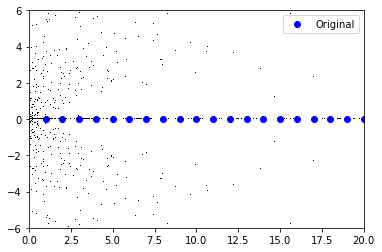

(array([  2.53337644e+12,   1.57789013e+12,   5.20781237e+11,
          2.23702566e+12,   5.03695403e+11,   8.43841728e+11,
          4.80444252e+11,   2.67346882e+11,   1.06612280e+12,
          1.65050803e+12,   2.12044673e+12,   4.09496301e+11,
          2.92215364e+12,   2.65190914e+12,   4.60906786e+11,
          1.92526861e+12,   1.72849752e+12,   6.26143224e+11,
          7.35384930e+12,   1.98252690e+12,   2.58139505e+11,
          3.38656450e+12,   8.39406837e+11,   1.76565397e+12,
          1.09787933e+12,   2.78854975e+12,   3.34797287e+12,
          9.15302846e+11,   5.31752267e+11,   1.01710203e+12,
          6.53132594e+11,   1.62246511e+12,   1.88177303e+12,
          6.81050279e+12,   5.67711944e+11,   8.78963666e+11,
          1.41851608e+12,   2.23710936e+13,   8.26000751e+11,
          2.28912255e+12,   2.91164422e+12,   6.28356686e+11,
          3.46683999e+12,   1.24651886e+12,   1.28229387e+12,
          1.16221293e+12,   1.77327475e+12,   3.35301729e+12,
        

In [145]:
x,i=sy.symbols('x i')
w=sy.poly_from_expr(sy.product(x-i, (i,1,20)))[0]
w_coeffs=np.array(w.all_coeffs())
w_roots=np.array(range(1,21,1))
k=np.zeros(100)
i=0
while i<100:
    c=np.random.normal(0,1e-10,21)
    new_coeffs=w_coeffs*c
    new_roots=np.roots(np.poly1d(new_coeffs))
    w_roots=np.sort(w_roots)
    new_roots=np.sort(new_roots)
    plt.plot(np.real(new_roots), np.imag(new_roots), 'k,')
    k[i]=la.norm(new_roots-w_roots,np.inf)/la.norm(c,np.inf)
    i+=1
plt.plot(np.real(w_roots), plt.np.imag(w_roots), 'bo', label='Original')
plt.xlim(0,20)
plt.ylim(-6,6)
plt.legend()
plt.show()
k,k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)

# Problem 3

In [146]:
def condeig(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    eigA=la.eig(A)[0]
    eigperturbed=la.eig(A+H)[0]
    k=np.linalg.norm(eigA-eigperturbed,2)/np.linalg.norm(H,2)
    return k, k*np.linalg.norm(A,2)/np.linalg.norm(eigA)

# Problem 4

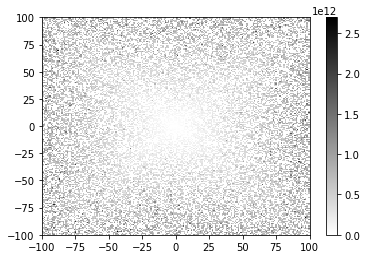

In [147]:
def condeigxy(xmax,xmin,ymax,ymin,res):
    x=np.linspace(xmin,xmax,res)
    y=np.linspace(ymin,ymax,res)
    X,Y=np.meshgrid(x,y)
    Z=np.empty_like(X)
    for i in range(res):
        for j in range(res):
            Z[i,j]=condeig(np.array([[1,X[i,j]],[Y[i,j],1]]))[1]
    return plt.pcolormesh(X,Y,Z,cmap='gray_r')
condeigxy(100,-100,100,-100,200)
plt.colorbar()
plt.show()

# Problem 5

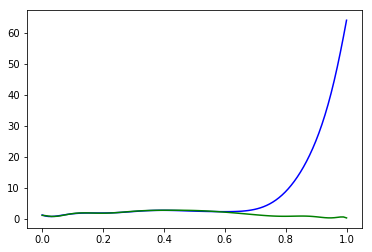

((152.14373083729362, 4.5683709417007901), None)

In [148]:
def prob5(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    x1=np.dot(np.dot(la.inv(np.dot(A.T,A)),A.T),yk)
    Q,R=la.qr(A,mode='economic')
    x2=la.solve_triangular(R,np.dot(Q.T,yk))
    p1=np.poly1d(x1)
    p2=np.poly1d(x2)
    plt.plot(xk, np.polyval(p1,xk),'b-')
    plt.plot(xk, np.polyval(p2,xk),'g-')
    error1=np.linalg.norm(np.dot(A,x1)-yk)
    error2=np.linalg.norm(np.dot(A,x2)-yk)
    return error1,error2
prob5(14), plt.show()

# Problem 6

In [199]:
I=np.zeros(10)
I_new=np.zeros(10)
x=sy.symbols('x')
j=0
while j<10:
    I[j]=sy.integrate((x**(5*j+5))*sy.exp(x-1),(x,0,1))
    I_new[j]=((-1)**(5*j+5))*sy.subfactorial(5*j+5)+((-1)**(5*j+10))*(sy.factorial(5*j+5)/sy.exp(1))
    j+=1
I, I_new    

(array([ 0.14553294,  0.08387707,  0.05901754,  0.04554488,  0.03708621,
         0.03127967,  0.02704629,  0.02382273,  0.02128604,  0.01923775]),
 array([ 0.14553294,  0.08387707,  0.05901754,  0.04554488,  0.03708621,
         0.03127967,  0.02704629,  0.02382273,  0.02128604,  0.01923775]))

In [200]:
la.norm(I-I_new)/la.norm(I)

0.0

I_new is a good way to compute the integrals.